## Desafios Aula 01

In [60]:
import pandas as pd
import numpy as np

caminho = './dados_imoveis.csv'
dados = pd.read_csv(caminho)

dados

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000
...,...,...,...,...,...,...,...,...
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000
10006,"Rua Manuel Onha, , 514",Vila Oratório,São Paulo,185,3,2,2,R$ 2.200\n /Mês


#### Desafio 1 
    - Realizar a média da metragem para cada um dos bairros. (Proposto pelo Paulo)

In [6]:
dados["Bairro"]

0         Planalto Paulista
1        Jardim dos Estados
2           Jardim Reimberg
3            Jardim Morumbi
4                     Mooca
                ...        
10003            Vila Sofia
10004       Bosque da Saúde
10005         Vila da Saúde
10006         Vila Oratório
10007           Vila Alpina
Name: Bairro, Length: 10008, dtype: object

    → Vamos buscar os dados pelo grupo de "Bairro", medir a mediana de "Metragem", devolver os dados com apenas duas casas decimais filtrando do menor valor até o maior em M2. 

In [31]:
metragem_bairros = dados.groupby("Bairro")["Metragem"].mean().round(2).sort_values()
metragem_bairros

Bairro
Vila Guaca                               10.00
Vila Leonor                              46.00
Jardim Benfica                           48.00
Jardim Nova Germania                     57.00
Cidade Antônio Estevão de Carvalho       57.50
                                        ...   
Chácara Flora                          1260.73
Jardim das Camélias                    1700.00
Jardim Guedala                         2486.64
Vila Castelo                           2850.00
Sítio Represa                         37000.00
Name: Metragem, Length: 701, dtype: float64

<AxesSubplot:xlabel='Bairro'>

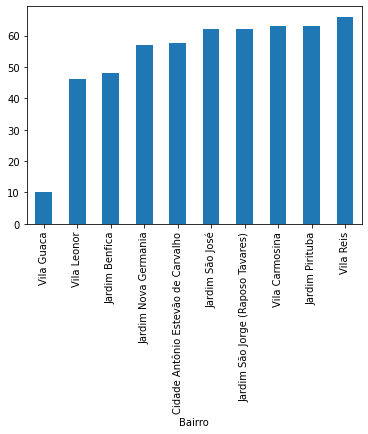

In [36]:
metragem_bairros.head(10).plot.bar()

<AxesSubplot:xlabel='Bairro'>

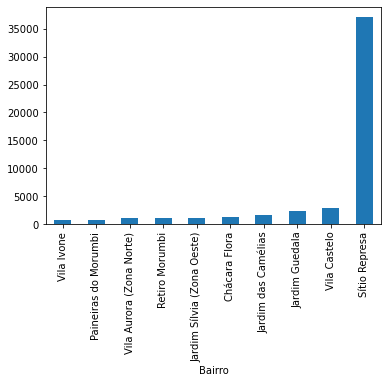

In [37]:
metragem_bairros.tail(10).plot.bar()

* Anotações sobre o desafio 1:
    
    - A partir dos resultados podemos analisar que a média dos imóveis é totalmente diferente, temos imóveis com 10m2 até 37000m2, mostrando assim que nossa média é realmente relativa, precisamos analisar melhor os dados, fazer mais limpezas, e refinar melhor nossas opções de busca de dados para termos um resultado mais preciso;
    
    - Muito interessante as várias maneiras que podemos realizar esse tipo de "raspagem", da maneira mais simples ( a apresentada aqui) até a maneira mais elaborada que pude ver buscando na internet para ajudar a realizar o desafio.

#### Desafio 02 
    - Duas formas de selecionar os dados por bairro (consultar os métodos na documentação do Pandas). (Proposto pelo Thiago)

In [42]:
dados["Bairro"].value_counts()

Alto de Pinheiros     409
Jardim Guedala        403
Jardim Paulista       309
Brooklin Paulista     247
Jardim Europa         240
                     ... 
Jardim das Imbuias      1
Vila Represa            1
Vila Nancy              1
Sítio Represa           1
Vila Invernada          1
Name: Bairro, Length: 701, dtype: int64

* 2.1 - usando Dataframe[], selecionando a coluna "Bairro" com seu respectivo nome.

In [41]:
df = pd.DataFrame(dados, columns=["Bairro"])
df

,Bairro
0,Planalto Paulista
1,Jardim dos Estados
2,Jardim Reimberg
3,Jardim Morumbi
4,Mooca
...,...
10003,Vila Sofia
10004,Bosque da Saúde
10005,Vila da Saúde
10006,Vila Oratório


* 2.2 - Query → Consultando a coluna "Bairro" do nosso banco de dados com uma expressão booleana.
    * Aqui vamos pesquisar pelo "Bairro Vila Mariana", e vamos receber no output todos os imóveis que estão localizados nesse bairro;
    * Se não existe nenhum imóvel, recebemos uma tabela vazia.

In [48]:
dados.query("Bairro == 'Vila Mariana'")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,R$ 1.700.000
...,...,...,...,...,...,...,...,...
9645,Rua Sousa Ramos,Vila Mariana,São Paulo,285,3,5,5,R$ 1.650.000
9701,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9737,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9807,NaN,Vila Mariana,São Paulo,275,3,1,6,R$ 1.500.000


#### Desafio 03
    - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, assim como tentar colocar alguma conclusão. (Proposto pelo Thiago)

<AxesSubplot:ylabel='Bairro'>

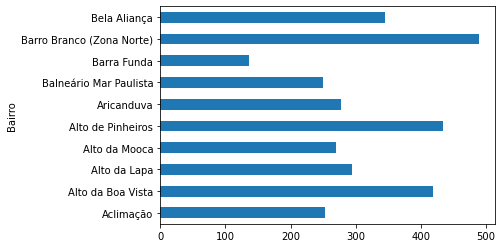

In [74]:
dados.groupby("Bairro")["Metragem"].mean().head(10).plot.barh()

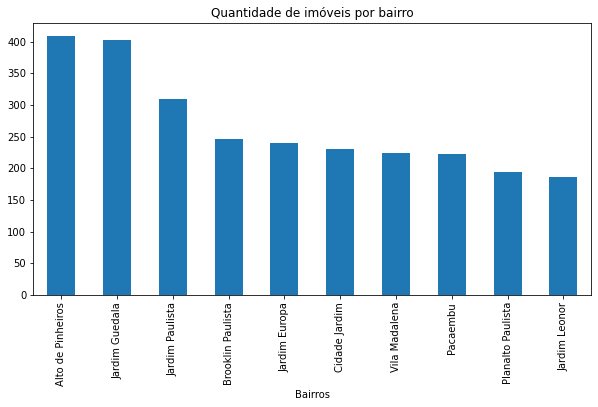

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.title("Quantidade de imóveis por bairro")
dados['Bairro'].value_counts().head(10).plot.bar()
plt.xlabel('Bairros')
plt.show()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

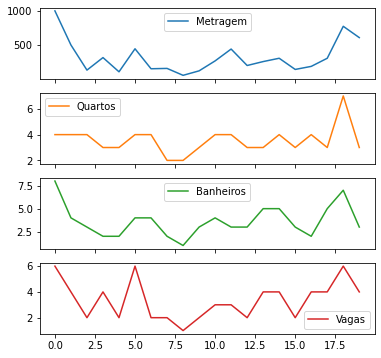

In [104]:
dados.head(20).plot(subplots=True, figsize=(6, 6))

#### Desafio 04 
    - Pegar outras estatísticas dos dados (como média, mediana, mim, max). (Proposto pela Vivian)

In [105]:
dados.groupby(['Bairro'])['Metragem'].describe()

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Aclimação,88.0,253.056818,159.140245,104.0,165.00,227.5,300.00,1500.0
Alto da Boa Vista,8.0,418.875000,111.880596,315.0,347.50,378.0,448.75,595.0
Alto da Lapa,86.0,294.337209,187.674036,46.0,151.25,255.0,363.75,1133.0
Alto da Mooca,20.0,270.050000,237.306924,84.0,133.75,182.5,221.25,805.0
Alto de Pinheiros,409.0,433.444988,145.676574,100.0,344.00,412.0,505.00,1530.0
...,...,...,...,...,...,...,...,...
Vila Água Funda,5.0,152.200000,44.353128,90.0,138.00,143.0,190.00,200.0
Água Branca,13.0,191.000000,91.045776,91.0,143.00,174.0,200.00,400.0
Água Fria,12.0,165.416667,82.934211,60.0,76.25,174.5,210.50,314.0


#### Desafio 05
     - Descobrir quais são os bairros que não tem nome de rua. (Proposto pela Vivian)

In [106]:
dados['Bairro'].value_counts().sort_index()

Aclimação             88
Alto da Boa Vista      8
Alto da Lapa          86
Alto da Mooca         20
Alto de Pinheiros    409
                    ... 
Vila Água Funda        5
Água Branca           13
Água Fria             12
Água Funda             2
Água Rasa              8
Name: Bairro, Length: 701, dtype: int64

In [119]:
sem_rua = dados[dados['Rua'].isnull()]
sem_rua

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
11,NaN,Jardim Luzitânia,São Paulo,436,4,3,3,R$ 15.000
31,NaN,Parque da Lapa,São Paulo,220,4,4,3,R$ 849.000
56,NaN,Chácara Santo Antônio (Zona Sul),São Paulo,190,2,2,2,R$ 1.100.000
57,NaN,Jardim Guedala,São Paulo,650,4,6,4,R$ 5.500.000
...,...,...,...,...,...,...,...,...
9963,NaN,Jardim Petrópolis,São Paulo,423,5,7,6,R$ 2.800.000
9989,NaN,Parque Alves de Lima,São Paulo,127,2,1,2,R$ 400.000
9991,NaN,Vila Formosa,São Paulo,145,3,2,3,R$ 750.000
9995,NaN,Jardim Leonor,São Paulo,1350,5,9,7,R$ 9.500.000


In [121]:
ruas_sem_nome = sem_rua['Bairro'].value_counts().sort_index()
ruas_sem_nome

Aclimação              2
Alto da Boa Vista      1
Alto da Lapa          29
Alto da Mooca          5
Alto de Pinheiros    169
                    ... 
Vila do Encontro       3
Água Branca            2
Água Fria              1
Água Funda             2
Água Rasa              3
Name: Bairro, Length: 394, dtype: int64